# w261 Final Project - Clickthrough Rate Prediction


Team 24   
Vivian Lu, Siddhartha Jakkamreddy, Venky Nagapudi, Luca Garre   
Summer 2019, sections 4 and 5   

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - Algorithm Explanation
* __Section 3__ - EDA & Challenges
* __Section 4__ - Algorithm Implementation
* __Section 5__ - Course Concepts

# __Section 1__ - Question Formulation

## __Introduction__
Online ad is a multibillion dollar industry fueled by large investments and ever increasing performance goals. Targeted advertisement based on users' browsing industry and demographic, ad features such as overall appearance, employed colors and text, and website features such as ad's relative placement in the webpage, sizes, etc., is receiving more and more interest due to its potential for revenue generation. In this context, machine learning is proving resourceful in the understanding of the features that mostly affect users' Click-Through Rates (CTR) and, based on this understanding, in informing the design of ads that maximize performance metrics such as click and convertion rates. Further, machine learning solutions can easily be deployed in a data pipeline enviroment in order to select and offer, on a user-specific basis, the ad which expectedly maximizes the user's interest. 

...

## __Goal of the analysis__
The purpose of the present analysis is to estimate whether a given ad will be clicked based on a set of features describing the ad. 

...

## __Description of the dataset__
The dataset is provided by __[put_reference_to_CriteoLabs]__ and is composed of three files, a `readme.txt`, a `train.txt` and a `test.txt` file, respectively. The readme file contains a brief description of the data. The `train.txt` and `test.txt` files contain the train and test data. Both files are formatted as tab separated value tables, and amount to 45840617 and 6042135 rows for the train and test data, respectively. Following the description of the data, each row represents an ad and contains the following fields (see commands below, these expect the data to be contained in a data folder inside the current working directory):

- 1 binary field indicating whether the ad has been clicked (1) or not (0). This field is available only for the train data;
- 13 fields containing integer features representing counts;
- 26 categorical features. These are hashed as 32 bits keys for anonymization purposes;

From a printout of the first rows of the data files it appears that the data contain no headers. This implies that, with the sole exception of the first binary field, it is not possible to characterize the various fields in terms of the features these represent. It is also noted that rows in the data can have missing values. This is again noticed when looking at the printed lines, as these have a number of entries which is lower than the number of fields specified in the `readme.txt` file. 

...

In [ ]:
#number of rows in the train data
!wc -l data/train.txt

In [ ]:
#number of rows in the test data
!wc -l data/test.txt

In [ ]:
# first row of the train data
!head -1 data/train.txt

In [ ]:
# first row of the test data
!head -1 data/test.txt

# __Section 2__ - Algorithm Explanation

## Logistic regression

Logistic regression belongs to the family of so-called generalized linear models and is by far one of the most known and applied algorithms for the prediction of a target variable $Y$, which represents the possible occurrence of an event of interest $e$. This variable is binary, and usually is encoded such that $Y=1$ represents the occurrence of $e$. More specifically, given a set of explanatory features $X_i$, $i = 1,2, \dots, n$, logistic regression characterizes the probability of occurrence of $e$, $\pi[e] \equiv \pi$, as follows:

\begin{equation}
\pi = \frac{1}{1 + \exp^{-z} }
\end{equation}

where $z = \beta_0 + \sum_{i=1}^n \beta_i X_i$ and $\beta_i$ are model parameters. As can be seen from the equation above, and in compliance with probability rules, $\pi \in (0, 1)$ for any $\beta_i$ and $X_i$, owing to the fact that the exponential function is strictly positive, and considering that the denominator is always higher than the numerator. After some algebraic manipulations an equivalent, and more compact, formulation of the above equation can be obtained as:

\begin{equation}
log\left( \frac{\pi}{1-\pi} \right) = \beta_0 + \sum_{i=1}^n \beta_i X_i
\end{equation}

where the left side is usually referred to as the logit function, $logit(\pi)$, while the right side makes the linear nature of this model explicit. This becomes clearer when considering the decision boundary, i.e., the hypersurface that segments the feature space in positive versus vegative regions. For logistic regression, such boundary is associated with the locus of points in the feature space where $\pi=0.5$, i.e., the model has no preference as to whether a point in this locus should be assigned to the positive or the negative class. Casting $\pi=0.5$ in the left side of the equation above renders a linear equation of the decision boundary in the feature space, in compliance with the linear nature of this model.  

## Log-loss function and parameter estimation

In accordance with established practices in the fields of statistics and machine learning, the parameters $\beta_i$ of the logistic regression model are estimated via maximization of the log-likelihood function. In essence, for a sample of $m$ data points $(x_{ij}, y_j)$, $i = 1,2,\dots,n$, $j = 1,2,\dots,m$, where $x_{ij}$ is the $j$-th record of the $i$-th feature, and $y_j$ is the $j$-th record of the target binary variable $Y$, the parameters $\beta_i$ are estimated such that the log-likelihood function:

\begin{equation}
log\left[ L(\beta_i|y_j) \right] = \frac{1}{m} log\left( \prod_{j = 1}^{m} \pi_j^{y_j} \left( 1-\pi_j \right)^{1-y_j} \right)
\end{equation}

is maximized. The term in the multiplication corresponds to the likelihood function of the Bernoulli distribution for the (degenerate) case of one single trial and number of successes $y_j = 1$ and $y_j = 0$ for success and failure, respectively.

Operationally, the above maximization is usually achieved taking the negative of the log-likelihood function and computing the parameters $\beta_i$ as the argmin of the negated log-likelihood which, after some manipulations, can be written as:

\begin{equation}
\hat{L} = -log\left[ L(\beta_i|y_j) \right] = - \frac{1}{m}\sum_{j=1}^{m} \left[ y_j \cdot log(\pi_j) + (1-y_j) \cdot log(1-\pi_j) \right]
\end{equation}

The right term of the equation, also called Cross-Entropy or log-loss, being a function $\pi$, is ultimately a function of the parameters $\beta_i$ and the features $X_i$ through the logistic regression relationship. The log-loss gives some insights as to the role of this function during estimation of the parameters. Let us assume that for a certain data point, $(x_{ij}, y_j)$, the target variable is equal to $1$. For this given data point, the right term of the equation simplifies to $-log(\pi_j)$. Since this term needs to be minimized, the parameters $\beta_i$ of the model need to be chosen such that $\pi_j$ approaches $1$ as closely as possible. Conversely for an observation $y_j = 0$, minimization of the log-loss, $-log(1 - \pi_j)$, requires $\pi_j$ to approach $0$. This dual role of the log-loss function makes such that likelihood maximization in logistic regression aims to find the set of model parameters which best separate positive from negative observations in the space of the explanatory features $X_i$, in the sense of mapping as closely as possible positive targets to $\pi = 1$ and negative targets to $\pi = 0$. Another appealing property, which turns out to the be of paramount importance for the strategy outlined below, is that this log-loss function is convex, i.e., one and only one point of minimum exists in the space of parameters $\beta_i$.

## Gradient descent

Finding the optimum set of parameters requires a suitable optimization framework. Among various approaches, gradient descent of $\hat{L}$ is a well-established approach for functions. For a certain point of the $n$-th dimensional space of parameters $\beta_i$, the gradient of the log-loss function, $\nabla \hat{L}$ is computed, and thereafter a translation is performed in the parameter space along the gradient direction (the steepest descent).

Gradient descent requires the computation of the gradient. In order to derive its formulation, it is convenient to consider the $i$-th component of $\nabla \hat{L}$, i.e.:

\begin{equation}
\nabla_i \hat{L} = \frac{\partial}{\partial \beta_i} \hat{L}
\end{equation}

Taking the derivative inside the summation and operating on the logarithm yields:

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left( \frac{y_j}{\pi_j} - \frac{1-y_j}{1-\pi_j} \right) \frac{\partial \pi_j}{\partial \beta_i}
\end{equation}

The derivative of the probability with respect to the parameter equates to (refer to the initial logistic regression formulation):

\begin{equation}
\frac{\partial \pi_j}{\partial \beta_i} = \frac{\exp^{-z_j}}{(1+\exp^{-z_j})^2} \frac{\partial z_j} {\partial \beta_i} = \frac{\exp^{-z_j}}{1+\exp^{-z_j}} \frac{1}{1+\exp^{-z_j}} \frac{\partial z_j} {\partial \beta_i} = (1-\pi_j) \pi_j \frac{\partial z_j} {\partial \beta_i}
\end{equation}

The derivative of the linear combination term yields:

\begin{equation}
\frac{\partial z_j} {\partial \beta_i} = x_{ij}
\end{equation}

Putting it all together, one finally obtains: 

\begin{equation}
\nabla_i \hat{L} = - \frac{1}{m} \sum_{j=1}^{m} \left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij} = \frac{1}{m}\sum_{j=1}^{m} (\pi_j-y_j) x_{ij}
\end{equation}

for $i = 1,2,\dots,n$. 

Assuming a certain starting point in the space of parameters, $\beta_i^0$, gradient descent first computes the gradient $\nabla \hat{L}$ at this starting point, and shifts the point along the direction of this gradient by computing a new point $\beta_i^1 = \beta_i^0 - \alpha \cdot \nabla \hat{L}$, where $\alpha$ is a learning rate. This is done iteratively until suitable stopping criteria are met.

## Algorithm for scalable implementation of logistic regression

- Assume starting values for logistic parameters $\beta_i^0$
- Set learning parameter $\alpha$
- For each iteration $k$:
- Broadcast parameters $\beta_i^{k}$ to all worker nodes
- Map: emit key-value pairs. Key: index $j$, values: target variable $y_j$ and array of explanatory features $x_{ij}$, for $j = 1,2,\dots,n$
- Map: for every $j = 1,2,\dots,n$ compute probability $\pi_j$ and $\left[ y_j (1-\pi_j) - (1-y_j) \pi_j \right] x_{ij}$
- Reduce: sum over $j$ and divide by $m$, for $i = 1,2,\dots,n$
- Update $\beta_i^{k}$
- Run next iteration

__References:__

Bilder, C.R. and Loughin, T.M. (2015). Analysis of Categorical Data with R. CRC Press. 

Kremonic, Z. (2017). Maximum likelihood and gradient descent demonstration. Blog post. Accessed on July 2019 at https://zlatankr.github.io/posts/2017/03/06/mle-gradient-descent.



Additional resources:

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://ttic.uchicago.edu/~suriya/website-intromlss2018/course_material/Day3b.pdf 

http://www.holehouse.org/mlclass/06_Logistic_Regression.html


# __Section 3__ - EDA & Challenges

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from os import path

In [2]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [3]:
# create Spark Session
from pyspark.sql import SparkSession
app_name = "final_project"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [26]:
# read in sample training data and convert to dataframe
train_sample = sc.textFile('data/sample_training.txt')\
                 .map(lambda x: x.split('\t'))\
                 .toDF().cache()

In [27]:
# head first three rows
train_sample.show(3)

+---+---+---+---+---+-----+---+---+---+---+---+---+---+---+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
| _1| _2| _3| _4| _5|   _6| _7| _8| _9|_10|_11|_12|_13|_14|     _15|     _16|     _17|     _18|     _19|     _20|     _21|     _22|     _23|     _24|     _25|     _26|     _27|     _28|     _29|     _30|     _31|     _32|_33|_34|     _35|     _36|     _37|     _38|_39|_40|
+---+---+---+---+---+-----+---+---+---+---+---+---+---+---+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
|  0|  0|  1|   |  0|16597|557|  3|  5|123|  0|  1|   |  1|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|0b153874|a73ee510|0095a535|3617b5f5|9f32b866|428332cf|b2

In [28]:
# convert numeric columns from string to double
convert_cols = ['_1','_2','_3','_4','_5','_6','_7','_8','_9','_10','_11','_12','_13','_14']

for col in convert_cols:
    train_sample = train_sample.withColumn(col, train_sample[col].cast("double"))
train_sample = train_sample.cache()

In [29]:
# head first three rows
train_sample.show(3)

+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
| _1|  _2| _3|  _4|  _5|     _6|   _7|  _8|  _9|  _10| _11|_12| _13| _14|     _15|     _16|     _17|     _18|     _19|     _20|     _21|     _22|     _23|     _24|     _25|     _26|     _27|     _28|     _29|     _30|     _31|     _32|_33|_34|     _35|     _36|     _37|     _38|_39|_40|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---+---+--------+--------+--------+--------+---+---+
|0.0| 0.0|1.0|null| 0.0|16597.0|557.0| 3.0| 5.0|123.0| 0.0|1.0|null| 1.0|8cf07265|7cd19acc|77f2f2e5|d16679b9|4cf72387|fbad5c96|8fb24933|

In [ ]:
# estimate click-through rate
num_ct = train_sample.groupBy().sum('_1').collect()[0][0]
num_ct/train_sample.count()

Add plots, discussions, etc. for EDA

# __Section 4__ - Algorithm Implementation

In [30]:
#generate train data for homegrown solution - select only 100,000 rows and only numerical features + target 
train_sample_red = train_sample.select(convert_cols).limit(10000).cache()

In [31]:
train_sample_red.show(3)

+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
| _1|  _2| _3|  _4|  _5|     _6|   _7|  _8|  _9|  _10| _11|_12| _13| _14|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
|0.0| 0.0|1.0|null| 0.0|16597.0|557.0| 3.0| 5.0|123.0| 0.0|1.0|null| 1.0|
|0.0| 1.0|0.0| 1.0|null| 1427.0|  3.0|16.0|11.0| 50.0| 0.0|2.0| 1.0|null|
|0.0|null|1.0|null|null|23255.0| null| 0.0| 1.0| 73.0|null|0.0|null|null|
+---+----+---+----+----+-------+-----+----+----+-----+----+---+----+----+
only showing top 3 rows



In [32]:
#impute missing values with averages
from pyspark.sql.functions import avg
for col in train_sample_red.columns:
    train_sample_red = train_sample_red.na.fill(round(train_sample_red.na.drop().agg(avg(col)).first()[0],1), [col])

In [33]:
train_sample_red.show(3)

+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+---+
| _1| _2| _3|  _4| _5|     _6|   _7|  _8|  _9|  _10|_11|_12|_13|_14|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+---+
|0.0|0.0|1.0|21.9|0.0|16597.0|557.0| 3.0| 5.0|123.0|0.0|1.0|0.9|1.0|
|0.0|1.0|0.0| 1.0|9.2| 1427.0|  3.0|16.0|11.0| 50.0|0.0|2.0|1.0|9.8|
|0.0|6.7|1.0|21.9|9.2|23255.0| 86.0| 0.0| 1.0| 73.0|0.7|0.0|0.9|9.8|
+---+---+---+----+---+-------+-----+----+----+-----+---+---+---+---+
only showing top 3 rows



In [34]:
#cache into rdd
train_sample_red_RDD = train_sample_red.rdd.map(lambda x: (x[0], np.array(x[1:]))).cache()

In [35]:
def normalize(dataRDD):
    """
    Scale and center data round mean of each feature.
    Args:
        dataRDD - records are tuples of (y, features_array)
    Returns:
        normedRDD - records are tuples of (y, features_array)
    """
    featureMeans = dataRDD.map(lambda x: x[1]).mean()
    featureStdev = np.sqrt(dataRDD.map(lambda x: x[1]).variance())

    normedRDD = dataRDD.map(lambda x: (x[0], (x[1] - featureMeans)/featureStdev))

    return normedRDD

In [16]:
# part d - write function to compute loss (FILL IN MISSING CODE BELOW)
def LogLoss(dataRDD, W, regType = None, regParam=0.1):
    """
    Compute log loss function.
    Args:
        dataRDD - each record is a tuple of (y, features_array)
        W       - (array) model coefficients with bias at index 0
        regType - (str) 'ridge' or 'lasso', defaults to None
        regParam - (float) regularization term coefficient defaults to 0.1
    Returns:
        loss - (float) the regularized loss
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0])).cache()
    
    # add regularization term
    reg_term = 0
    if regType == 'ridge':
        reg_term = regParam*np.linalg.norm(W[1:])
    elif regType == 'lasso':
        reg_term = regParam*np.sum(np.abs(W[1:]))
    
    # compute loss
    loss = augmentedData.map(lambda x: x[1]*np.log(1 + np.exp(-np.dot(x[0], W))) + \
                             (1 - x[1])*(np.dot(x[0], W) + np.log(1 + np.exp(-np.dot(x[0], W))))).sum()\
                            /augmentedData.count()
    
    return loss

In [17]:
def GDUpdate(dataRDD, W, regType = None, regParam=0.1, learningRate = 0.1):
    """
    Perform one regularized gradient descent step/update.
    Args:
        dataRDD - records are tuples of (y, features_array)
        W       - (array) model coefficients with bias at index 0
        regType - (str) 'ridge' or 'lasso', defaults to None
        regParam - (float) regularization term coefficient defaults to 0.1
        learningRate - (float) defaults to 0.1
    Returns:
        new_model - (array) updated coefficients, bias at index 0
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0]))
    
    # add regularization term
    reg_term = np.zeros(len(W))
    if regType == 'ridge':
        reg_term = np.append(0,2*regParam*W[1:])
    elif regType == 'lasso':
        reg_term = np.append(0,regParam*np.sign(W[1:]))
    
    # compute gradient
    grad = augmentedData.map(lambda x: ((1/(1 + np.exp(-np.dot(x[0], W))) - x[1])*x[0])).sum()/augmentedData.count() + reg_term
    
    #update model parameters
    new_model = W - learningRate*grad
   
    return new_model

In [18]:
def makePrediction(dataRDD, W):
    """
    Perform one regularized gradient descent step/update.
    Args:
        dataRDD - records are tuples of (y, features_array)
        W       - (array) model coefficients with bias at index 0
    Returns:
        pred - (rdd) predicted targets
    """
    # add a bias 'feature' of 1 at index 0
    augmentedData = dataRDD.map(lambda x: (np.append([1.0], x[1]), x[0])).cache()
    
    # compute prediction
    pred = augmentedData.map(lambda x: int((1/(1 + np.exp(-np.dot(x[0], W))))>0.5) )
   
    return pred

In [36]:
# normalize features
normedRDD = normalize(train_sample_red_RDD).cache()

In [ ]:
#compute the number of features
numb_features = len(train_sample_red.columns) - 1
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)

In [ ]:
nSteps = 150
learningRate = 0.5
regType = 'lasso'
regParam = 0.02

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE #model = sc.broadcast(BASELINE) #substitute this line with the comment when deploying it on the cloud
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(normedRDD, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(normedRDD, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))
    
    #broadcast model
    #model = sc.broadcast(model) #uncomment this line when deploying it on the cloud

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [ ]:
print(f'number of true positives is {normedRDD.map(lambda x: x[0]).sum()}')
res = makePrediction(normedRDD, model).cache()
print(f'number of predicted positives is {res.sum()}')

### Factorization Machines

The logistic regression will take care of the linear terms, now to account for the interaction term, we expand to include 2nd Degree polynomial features. The below equation represents the formulation.

\begin{align}
\hat{y}(\textbf{x}) = w_{0} + \sum_{i=1}^{n} w_{i} x_{i} +  \sum_{i=1}^n \sum_{j=i+1}^n w_{ij} x_{i} x_{j}
\end{align}

The challenge with solving the above equation is that the time complexity is $O(n^2)$

In order to work with this, we use a matrix factorization technique for the interaction terms, inspired by Matrix factorization. We introduce a hyperpameter K which represent the latent factors for factorizing the weight vector $w_{ij}$.

\begin{align}
\hat{y}(\textbf{x}) = w_{0} + \sum_{i=1}^{n} w_{i} x_{i} + \sum_{i=1}^{n} \sum_{j=i+1}^n \langle \textbf{v}_i , \textbf{v}_{j} \rangle x_i x_{j}
\end{align}


Using the computation specified in Stephen Rendles paper, we can simplify the interaction term to the below equation.

\begin{align}
\sum_{i=1}^n \sum_{j=i+1}^n \langle \textbf{v}_i, \textbf{v}_{j} \rangle x_{i} x_{j}
&= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \langle \textbf{v}_i, \textbf{v}_{j} \rangle x_{i} x_{j} - \frac{1}{2} \sum_{i=1}^n \langle \textbf{v}_i , \textbf{v}_{i} \rangle x_{i} x_{i}  \\
&= \frac{1}{2}\left(\sum_{i=1}^n \sum_{j=1}^n \sum_{f=1}^k v_{i,f} v_{j,f} x_{i} x_{j} \right)\frac{1}{2}\left( \sum_{i=1}^n \sum_{f=1}^k v_{i,f} v_{i,f} x_{i} x_{i} \right) \\
&= \frac{1}{2}\left(\sum_{i=1}^n \sum_{j=1}^n \sum_{f=1}^k v_{i,f} v_{j,f} x_{i} x_{j}  -  \sum_{i=1}^n \sum_{f=1}^k v_{i,f} v_{i,f} x_{i} x_{i} \right) \\
&= \frac{1}{2} \sum_{f=1}^{k} \left( \left(\sum_{i=1}^n v_{i,f}x_{i} \right) \left( \sum_{j=1}^n v_{j,f}x_{j} \right) - \sum_{i=1}^{n} v_{i,f}^2 x_{i}^2 \right) \\
&= \frac{1}{2} \sum_{f=1}^{k} \left( \left( \sum_{i}^{n} v_{i,f}x_{i} \right)^2  - \sum_{i=1}^{n} v_{i,f}^2 x_{i}^2 \right)
\end{align}

So, we can rewrite the equation to compute in $O(n)$ as
\begin{align}
\hat{y}(\textbf{x}) = w_{0} + \sum_{i=1}^{n} w_{i} x_{i} + \frac{1}{2} \sum_{f=1}^{k} \left( \left( \sum_{i}^{n} v_{i,f}x_{i} \right)^2  - \sum_{i=1}^{n} v_{i,f}^2 x_{i}^2 \right)
\end{align}

#### Gradient

For our classification problem, we can define the gradients as :

\begin{align}
\frac{\partial}{\partial\theta}\hat{y}(\textbf{x}) =
\begin{cases}
1,  & \text{if $\theta$ is $w_0$} \\
x_i, & \text{if $\theta$ is $w_i$} \\
x_i\sum_{j=1}^{n} v_{j,f}x_j - v_{i,f}x_{i}^2 & \text{if $\theta$ is $v_{i,f}$}
\end{cases}
\end{align}

\begin{align}
\frac{\partial}{\partial \hat{y} }(\textbf{L}) =
\frac{d}{d \hat{y}}\left[ \ln \big(e^{-y \hat{y}} + 1 \big) \right] 
&= \frac{1}{e^{-y \hat{y}} + 1} \cdot  \frac{d}{dx}\left[e^{-y \hat{y}} + 1 \right] \\
&= -\frac{y}{e^{y \hat{y}} + 1}
\end{align}

The gradient of loss is defined by (by using chain rule):

\begin{align}
\frac{\partial}{\partial \theta }(\textbf{L}) = 
\frac{\partial}{\partial \hat{y} }(\textbf{L}) \centerdot \frac{\partial}{\partial \theta}\hat{y}(\textbf{x}) 
\end{align}




In [ ]:
def fmLoss(dataRDD, w) :
    """
    Computes the logloss given the data and model W
    dataRDD - array of features, label
    """
    w_bc = sc.broadcast(w)
    def probability_value(x,W): 
        xa = np.array([x])
        V =  xa.dot(W)
        V_square = (xa*xa).dot(W*W)
        phi = 0.5*(V*V - V_square).sum()
        return 1.0/(1.0 + np.exp(-phi))
    
    loss = dataRDD.map(lambda x:  (probability_value(x[1],w_bc.value), x[0])) \
        .map(lambda x: (1 - 1e-12, x[1]) if x[0] == 1 else ((1e-12, x[1]) if x[0] == 0  else (x[0],x[1]))) \
        .map(lambda x: -(x[1] * np.log(x[0]) - (1-x[1])*np.log(1-x[0]))).mean()
    
    return loss

In [ ]:
def fmGradUpdate_v1(dataRDD, w, alpha, regParam):
    """
    Computes the gradient and updates the model
    """
    
    G = np.zeros(np.shape(w))
    w_bc = sc.broadcast(w)
    a_bc = sc.broadcast(alpha)
    def row_grad(x, y, W, regParam):
        xa = np.array([x])
        VX =  xa.dot(W)
        VX_square = (xa*xa).dot(W*W)
        phi = 0.5*(VX*VX - VX_square).sum()
        expnyt = np.exp(y*phi)
        grad_loss = (-y)/(1+expnyt)*(xa.T.dot(xa).dot(W) - np.diag(np.square(x)).dot(W))
        
        return regParam*W + grad_loss
      
    grad = dataRDD.map(lambda x: (1, row_grad(x[1], x[0], w_bc.value, regParam))).reduceByKey(lambda x,y: np.add(x,y))
    model = w - alpha * grad.values().collect()[0] 
    
    return model
    

In [ ]:
def GradientDescent(trainRDD, testRDD, wInit, nSteps = 20, 
                    learningRate = 0.01, regParam = 0.01, verbose = False):
    """
    Perform nSteps iterations of OLS gradient descent and 
    track loss on a test and train set. Return lists of
    test/train loss and the models themselves.
    """
    # initialize lists to track model performance
    train_history, test_history, model_history = [], [], []
    
    # perform n updates & compute test and train loss after each
    model = wInit
    for idx in range(nSteps): 
        
        ############## YOUR CODE HERE #############
        model = fmGradUpdate_v1(trainRDD, model, learningRate, regParam)
        training_loss = fmLoss(trainRDD, model) 
        test_loss = fmLoss(testRDD, model) 
        ############## (END) YOUR CODE #############
        
        # keep track of test/train loss for plotting
        train_history.append(training_loss)
        test_history.append(test_loss)
        model_history.append(model)
        
        # console output if desired
        if verbose:
            print("----------")
            print(f"STEP: {idx+1}")
            print(f"training loss: {training_loss}")
            print(f"test loss: {test_loss}")
            print(f"Model: {[k for k in model]}")
   
    return train_history, test_history, model_history

In [ ]:
def wInitialization(dataRDD, factor):
    nrFeat = len(dataRDD.first()[1])
    np.random.seed(int(time.time())) 
    w =  np.random.ranf((nrFeat, factor))
    w = w / np.sqrt((w*w).sum())
    
    return w

In [ ]:
start = time.time()
wInit = wInitialization(normedRDD, 2)
#print(wInit)
logerr_train, logerr_test, models = GradientDescent(normedRDD, normedRDD, wInit, nSteps = 200,
                                                    learningRate = 0.001, regParam = 0.01, verbose = False)
print(f"\n... trained {len(models)} iterations in {time.time() - start} seconds")
print(models[-1])

In [ ]:
print(f"The estimated model is: {models[-1]}")
print(f"The loss of the estimated model is: {logerr_train[-1]}")
print()
print()
plt.plot(logerr_train)
plt.title('Loss')
plt.show()

In [ ]:
def fmMakePrediction(dataRDD, w):
    """
    Perform one regularized gradient descent step/update.
    Args:
        dataRDD - records are tuples of (y, features_array)
        W       - (array) model coefficients with bias at index 0
    Returns:
        pred - (rdd) predicted targets
    """
    w_bc = sc.broadcast(w)
    def predict_fm(x, W):
        xa = np.array([x])
        VX =  xa.dot(W)
        VX_square = (xa*xa).dot(W*W)
        phi = 0.5*(VX*VX - VX_square).sum()
        return phi
    
    # compute prediction
    pred = dataRDD.map(lambda x: int(predict_fm(x[1],w_bc.value)>0.5) )
   
    return pred

In [ ]:
print(f'number of true positives is {normedRDD.map(lambda x: x[0]).sum()}')
res = fmMakePrediction(normedRDD, models[-1]).cache()
print(f'number of predicted positives is {res.sum()}')

## 4.1 Adding Categorical Variables

### Summary
The earlier section showed a logistic regression model with numerical variables only. In this section, we incrementally add categorical variables and redo the logistic regression model on a small data set. Categorical variables present a challenge because each of them can have a million different values thereby creating millions of dimensions. To get around "the curse of dimensionality", we looked at quite a few methods to reduce the dimensions to a manageable level. This includes frequency based dimensionality reduction and hashing techniques at a feature level and at a collection of features. 

### "The curse of dimensionality" with categorical variables
Below, we take a look at the number of dimensions in the train_sample dataset for each categorical variable

In [ ]:
# number of unique categorical values
from pyspark.sql.functions import col
distCatVarCnt = 0
for col in train_sample.columns[14:]:
    cnt = train_sample.select(col).distinct().count()
    print('Column ' + col + ' has ' + str(cnt) \
          + ' unique categorical values')
    distCatVarCnt += cnt
print("Total number of distinct categorical variables in train_sample is:", distCatVarCnt)

As we can see above, the number of unique categorical variables is close to 3 million just for the train_sample dataset. We need to look into reducing the dimensionality without losing too much of information.

### 4.1.1 Per column frequency based dimensionality reduction

One possible methold is to figure out if there are any frequent values in these categorical variables and choose the top 15 of them. If they make up nearly 100% of the values, then we can lump the rest under "Other" and come up with 16 column bins. This is a compute intensive operation as we try to figure out the top 15 values for each column and their contribution to the total count

In [ ]:
train_sample_rdd = sc.textFile('data/sample_training.txt')
testRdd = sc.parallelize(train_sample_rdd.take(100000))

#rddLen = testRdd.count()
rddLen = train_sample_rdd.count()

top15FreqList = dict()
top15FreqPercent = dict()

top15df = pd.DataFrame(columns=['col', 'top15_values', 'top15_pct_contribution'])

for col in range(14,40):
    #col = "_"+str(c)
    catRdd = train_sample_rdd.map(lambda x: x.split('\t')[col]) \
                             .map(lambda x: (x,1)) \
                             .reduceByKey(lambda x,y: x + y)
    freqRecord = catRdd.takeOrdered(15, key=lambda x: -x[1])
    freqList = []
    freqCnt = 0
    for (k,v) in freqRecord:
        freqCnt += v
        freqList.append(str(k))
    #top15FreqList[col] = freqList
    #top15FreqPercent[col] = 100* freqCnt / rddLen
    top15df = top15df.append({'col': col, 'top15_values': freqList, 'top15_pct_contribution': 100*freqCnt/rddLen}, ignore_index=True)
    #cnt = catRdd.count()
    #print ("Top 15 values for column", col, "namely: ", top15FreqList[col], "make up ", top15FreqPercent[col], " of the values")
    
print(top15df.to_string())

From the above analysis, we can see that the categorical variables in some of the columns account for almost 100% of all values. These include columns 14, 18, 19, 21, 22, 27, 30, 32, 33, 35, 36 and 38. For these 11 columns, it would make sense to keep the top 15 values and lump everything else under an "Other" column.

For the rest of the columns that don't exhibit this behavior, it might make sense to look at other strategies such as hashing to reduce dimensionality. Before we take this approach of using both the frequency related information and hashing, let's first take a look at hashing all columns next.

### 4.1.2 Per column Feature Hashing
There are 26 categorical features in this model represented by strings that are 8 bytes long. So, theoretically, each string can take $2^{64} -1$ different values and lead to that many dimensions. We need to have far fewer dimensions so that we can make the problem computationally achievable and as well lead to a generalized algorithm as well. One way of achieving this is through what is popularly called the "hashing trick" (provide references). 

A simple way to reduce dimensionality is to hash the 8 byte long strings into, say 16 or 32 groups. We used the murmurHash3 hashing which is generally the preferred way of hashing strings (provide references and more details). Hashing leads to collisions as many strings could end up hashing to the same hash value. However, it has been proven (references) that even with collisions, hashing leads to very generalized models.

One the categorical variables are hashed down to, say 16 values, they are then 1-hot encoded and fed into the logistic regression model. This section presents the results with the inclusion of 27 categorical variables, each individually hashed to 16 values, in addition to the numerical variables in the earlier section. 

In [ ]:
#Install murmurhash3 if needed
!pip install murmurhash3
import mmh3

In [37]:
#Read in the complete dataset
train_sample_rdd = sc.textFile('data/sample_training.txt')

#Get the top 1000 rows only (as before for numerical variables)
testRdd = sc.parallelize(train_sample_rdd.take(10000),1)

In [38]:
def createHash (elem,hlen):
    import mmh3
    hashStr = []
    for str in elem:
        hashStr.append(mmh3.hash(str) % int(hlen))
    return(hashStr)

def create1Hot(elem, hlen):
    oneHotStr = []
    #for hashStr in elem:
    for i in range (hlen):
        if (i == elem):
            oneHotStr.append(1)
        else:
            oneHotStr.append(0)
    return(oneHotStr)

def createCatArray(elem):
    catArray = []
    for array in elem:
        for x in array:
            catArray.append(x)
    return(np.array(catArray))

#Define murmurHash level for 1-hot encoding
HASHLEN = 16

#testRdd.map(lambda x : x.split('\t')[14:40]).map(lambda x: [mmh3.hash(xn)%16 for xn in x]).take(5)
categoricalRdd = testRdd.map(lambda x : x.split('\t')[14:40]) \
                        .map(lambda x: createHash(x,HASHLEN)) \
                        .map(lambda x: [create1Hot(xn, HASHLEN) for xn in x]) \
                        .map(createCatArray)
categoricalRdd.take(2)

[array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [39]:
#Now include this into the logistic regression model
#Zip numerical and categorical variables

def mergeNumPlusCatRdds(elem):
    x, y = elem
    xkey , xval = x
    merge =  (xkey, np.hstack((xval,y)))
    return(merge)

numPlusCatRdd = normedRDD.zip(categoricalRdd) \
                         .map(mergeNumPlusCatRdds)
numPlusCatRdd.take(1)

[(0.0, array([-0.47547949, -0.28723426, -0.03746799, -0.92965574, -0.01272051,
          1.24738994, -0.19755653, -0.15479084, -0.00440928, -1.27487322,
         -0.34456582, -0.00283255, -0.26716893,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        

In [40]:
#compute the number of features
numb_features = np.size(numPlusCatRdd.first()[1])
print(numb_features)
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)

429


In [44]:
#split into train, validation and test sets
train, validation, test = numPlusCatRdd.randomSplit([0.6, 0.2, 0.2])

----------
STEP: 1
----------
STEP: 2
----------
STEP: 3
----------
STEP: 4
----------
STEP: 5
----------
STEP: 6
----------
STEP: 7
----------
STEP: 8
----------
STEP: 9
----------
STEP: 10
----------
STEP: 11
----------
STEP: 12
----------
STEP: 13
----------
STEP: 14
----------
STEP: 15
----------
STEP: 16
----------
STEP: 17
----------
STEP: 18
----------
STEP: 19
----------
STEP: 20
----------
STEP: 21
----------
STEP: 22
----------
STEP: 23
----------
STEP: 24
----------
STEP: 25
----------
STEP: 26
----------
STEP: 27
----------
STEP: 28
----------
STEP: 29
----------
STEP: 30
----------
STEP: 31
----------
STEP: 32
----------
STEP: 33
----------
STEP: 34
----------
STEP: 35
----------
STEP: 36
----------
STEP: 37
----------
STEP: 38
----------
STEP: 39
----------
STEP: 40
----------
STEP: 41
----------
STEP: 42
----------
STEP: 43
----------
STEP: 44
----------
STEP: 45
----------
STEP: 46
----------
STEP: 47
----------
STEP: 48
----------
STEP: 49
----------
STEP: 50
---------

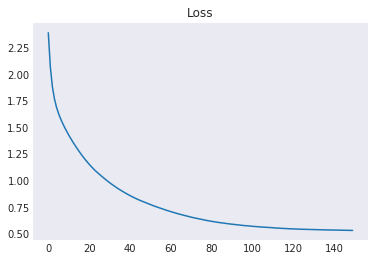

Text(0.5,1,'Norm of vector of parameters')

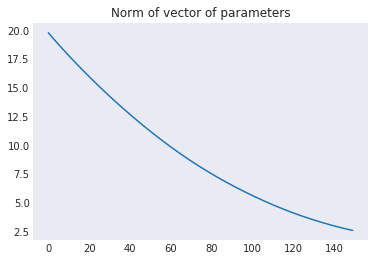

In [42]:
nSteps = 150
learningRate = 0.5
regType = 'lasso'
regParam = 0.02

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE #model = sc.broadcast(BASELINE) #substitute this line with the comment when deploying it on the cloud
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(numPlusCatRdd, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(numPlusCatRdd, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))
    
    #broadcast model
    #model = sc.broadcast(model) #uncomment this line when deploying it on the cloud

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [43]:
print(f'number of true positives is {numPlusCatRdd.map(lambda x: x[0]).sum()}')
res = makePrediction(numPlusCatRdd, model).cache()
print(f'number of predicted positives is {res.sum()}')

number of true positives is 2415.0
number of predicted positives is 129


### 4.1.3 Multi-column Feature Hashing
Hashing each column independently resulted in a dimensionality reduction from several million vectors to 416 for the categorical variables. We could further reduce dimensionality through multi-column Feature Hashing with a likely tradeoff being the loss of accuracy (TBD). 

We used the multi-column FeatureHashing functionality in Apache Spark MLLib to look into how dimensionality reduction to fewer vectors for logistic regression. Multi-column FeatureHashing would be very handy when we start looking at adding in quadratic terms for logistic regression. Instead of a (416,416) quadratic feature matrix, we could deal with a smaller (32,32) or (64,64) features, leading to faster computation.

#### Spark MLLib FeatureHasher example
The FeatureHasher in spark takes multiple columns of categorical (and numerical) variables and hashes them down to fewer features. It is possible to specify the number of output features so that we can restrict the dimensions to a more manageable number.

In [ ]:
#Feature hashing example
from pyspark.ml.feature import FeatureHasher

dataset = spark.createDataFrame([
    (2.2, True, "1", "foo"),
    (3.3, False, "2", "bar"),
    (4.4, False, "3", "baz"),
    (5.5, False, "4", "foo")
], ["real", "bool", "stringNum", "string"])

hasher = FeatureHasher(inputCols=["real", "bool", "stringNum", "string"],
                       outputCol="features")

featurized = hasher.transform(dataset)
featurized.select("features").show(truncate=False)

#### Multi-column Feature Hashing with test set
We applied Multi-column Feature Hashing to get to a dimensionality of 64 vectors using FeatureHasher. The results of the logistic regression following this hashing are given below (need to add time, accuracy etc...How do you compare otherwise?)

In [ ]:
# read in sample training data and convert to dataframe
train_sample1 = sc.textFile('data/sample_training.txt')\
                 .map(lambda x: x.split('\t'))\
                 .toDF().limit(10000).cache()
train_sample1.show(3)

In [ ]:
#choose categorical columns to Hash
hashInpList = []
for c in range(14,41):
    col = "_"+str(c)
    hashInpList.append(col)
print (hashInpList)

In [ ]:
#Apply Multi-column hashing with 32 output features
hasher = FeatureHasher(numFeatures=256, inputCols=hashInpList,outputCol="features")

featurized = hasher.transform(train_sample1)
featurized.select("features").show(3,truncate=False)

In [ ]:
featurized.show(3)
featurized.rdd.getNumPartitions()

In [ ]:
#Convert into a dense vector format to feed logistic regression model
def extractVec (elem):
    return(np.array(tuple(elem.features.toArray().tolist())))
    
multiHashCatRdd = featurized.select("features").rdd.map(extractVec)
#map(extractVec)
multiHashCatRdd.take(3)
multiHashCatRdd.getNumPartitions()

In [ ]:
featurized.show(3)

In [ ]:
#Now include this into the logistic regression model
#Zip numerical and categorical variables

def mergeNumPlusCatRdds(elem):
    x, y = elem
    xkey , xval = x
    merge =  (xkey, np.hstack((xval,y)))
    return(merge)

numPlusCatRdd2 = normedRDD.zip(multiHashCatRdd) \
                         .map(mergeNumPlusCatRdds)
numPlusCatRdd2.take(1)
numPlusCatRdd2.getNumPartitions()

In [ ]:
#compute the number of features
numb_features = np.size(numPlusCatRdd2.first()[1])
print(numb_features)
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)


In [ ]:
nSteps = 100
learningRate = 0.5
regType = None
regParam = 0.05

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE #model = sc.broadcast(BASELINE) #substitute this line with the comment when deploying it on the cloud
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(numPlusCatRdd2, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(numPlusCatRdd2, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))
    
    #broadcast model
    #model = sc.broadcast(model) #uncomment this line when deploying it on the cloud

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [ ]:
print(f'number of true positives is {numPlusCatRdd2.map(lambda x: x[0]).sum()}')
res = makePrediction(numPlusCatRdd2, model).cache()
print(f'number of predicted positives is {res.sum()}')

# __Section 5__ - Course Concepts

### TOY EXAMPLE - comparison with ScikitLearn

In [ ]:
#TOY EXAMPLE STARTS HERE
numb_features = 2

N = 100
D = 3

X_toy = np.random.randn(N,D)

# center the first 50 points at (-1,-1)
X_toy[:50,:] = X_toy[:50,:] - 1*np.ones((50,D))

# center the last 50 points at (2, 2)
X_toy[50:,:] = X_toy[50:,:] + 2*np.ones((50,D))

X_toy[:50,0] = 0
X_toy[50:,0] = 1

rdd1 = sc.parallelize(X_toy)
rdd1 = rdd1.map(lambda x: [float(i) for i in x])
toy_sample_red = rdd1.toDF(["_1", "_2", "_3"])
toy_sample_red_RDD = toy_sample_red.rdd.map(lambda x: (x[0], x[1:])).cache()

In [ ]:
#define baseline model, add one parameter representing the intercept
BASELINE = np.random.randn(numb_features + 1)

In [ ]:
nSteps = 150
learningRate = 0.5
regType = 'ridge'
regParam = 0.05

Loss_save = []
Model_norm = []
#broadcast model
model = BASELINE
for idx in range(nSteps):
    #print("----------")
    #print(f"STEP: {idx+1}")
    
    # compute loss
    loss = LogLoss(toy_sample_red_RDD, model, regType=regType, regParam=regParam)
    # update model parameters
    model = GDUpdate(toy_sample_red_RDD, model, regType=regType, regParam=regParam, learningRate=learningRate)
    
    #store results
    Loss_save.append(loss)
    Model_norm.append(np.linalg.norm(model))

print(f"The estimated model is: {model}")
print(f"The loss of the estimated model is: {loss}")
print()
print()
plt.plot(Loss_save)
plt.title('Loss')
plt.show()
plt.plot(Model_norm)
plt.title('Norm of vector of parameters')

In [ ]:
#actual simulated value is 50
res = makePrediction(toy_sample_red_RDD, model).cache()
res.sum()

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
X, y = X_toy[:,1:],X_toy[:,0]
clf = LogisticRegression(random_state=0, solver='lbfgs',fit_intercept=True).fit(X, y)
print(clf.coef_, clf.intercept_)

In [ ]:
plt.scatter(X_toy[:,1], X_toy[:,2], c=X_toy[:,0], s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(model[0] + x_axis*model[1]) / model[2]
plt.plot(x_axis, y_axis)
y_axis = -(clf.intercept_+x_axis*clf.coef_[0][0]) / clf.coef_[0][1]
plt.plot(x_axis, y_axis)
plt.show()

In [ ]:
convert_cols = ['_1','_2','_3','_4','_5','_6','_7','_8','_9','_10','_11','_12','_13','_14']

In [ ]:
#generate train data for homegrown solution - select only 1000 rows and only numerical features + one categorical variable +target 
train_sample_red = train_sample.select(convert_cols + ['_23']).limit(1000)

In [ ]:
train_sample_red.show(3)

In [ ]:
#impute missing values with averages
from pyspark.sql.functions import avg
for col in convert_cols:
    train_sample_red = train_sample_red.na.fill(round(train_sample_red.na.drop().agg(avg(col)).first()[0],1), [col])

In [ ]:
from pyspark.sql.functions import col, split
df = train_sample_red.withColumn("_23", split(col("_23")," "))
df.show(3)

In [ ]:
from pyspark.ml.feature import CountVectorizer
cat_Vectorizer = CountVectorizer(inputCol="_23", outputCol="_23_array", vocabSize=4, minDF=1.0)

In [ ]:
catVectorizer_model = cat_Vectorizer.fit(df)

In [ ]:
df_ohe = catVectorizer_model.transform(df)

In [ ]:
StringIndexer(inputCols=["gender"], outputCols=["gender_numeric"])

### Cardinality of categorical variables

In [ ]:
# number of unique categorical values
from pyspark.sql.functions import col
for col in train_sample.columns[14:]:
    print('Column ' + col + ' has ' + str(train_sample.select(col).distinct().count()) \
          + ' unique categorical values')

### Bar plots of selected variables

In [ ]:
# histogram of target variable
hist_c1 = train_sample.select('_1').rdd.flatMap(lambda x: x).histogram(2)
pd.DataFrame(list(zip(*hist_c1))).set_index(0).plot(kind='bar');

In [ ]:
# histogram of column 20
hist_c20 = train_sample.groupBy('_20').count().collect()
pd.DataFrame(list(zip(*hist_c20))).T.set_index(0).plot(kind='bar')

In [ ]:
# histogram of column 23
hist_c23 = train_sample.groupBy('_23').count().collect()
pd.DataFrame(list(zip(*hist_c23))).T.set_index(0).plot(kind='bar')

In [ ]:
# histogram of column 28
hist_c28 = train_sample.groupBy('_28').count().collect()
pd.DataFrame(list(zip(*hist_c28))).T.set_index(0).plot(kind='bar')

In [ ]:
# histogram of column 31
hist_c31 = train_sample.groupBy('_31').count().collect()
pd.DataFrame(list(zip(*hist_c31))).T.set_index(0).plot(kind='bar')

In [ ]:
# histogram of column 34
hist_c34 = train_sample.groupBy('_34').count().collect()
pd.DataFrame(list(zip(*hist_c34))).T.set_index(0).plot(kind='bar')

In [ ]:
# histogram of column 36
hist_c36 = train_sample.groupBy('_36').count().collect()
pd.DataFrame(list(zip(*hist_c36))).T.set_index(0).plot(kind='bar')

### Estimates of ctr based on category

In [ ]:
# for column 20
list_labls_vals = list(zip(*train_sample.groupBy('_20').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_20').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

In [ ]:
# for column 23
list_labls_vals = list(zip(*train_sample.groupBy('_23').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_23').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

In [ ]:
# for column 28
list_labls_vals = list(zip(*train_sample.groupBy('_28').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_28').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

In [ ]:
# for column 31
list_labls_vals = list(zip(*train_sample.groupBy('_31').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_31').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

In [ ]:
# for column 34
list_labls_vals = list(zip(*train_sample.groupBy('_34').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_34').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)

In [ ]:
# for column 36
list_labls_vals = list(zip(*train_sample.groupBy('_36').sum('_1').collect()))
labls = list_labls_vals[0]
vals = np.array(list_labls_vals[1])/np.array(list(zip(*train_sample.groupBy('_36').count().collect()))[1])

ax = pd.DataFrame(vals).plot(kind='bar')
ax.set_xticklabels(labls)